In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [12]:
data.data.shape

(569, 30)

In [54]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score_pre

0.9632443176907787

0.9633058940454584 101


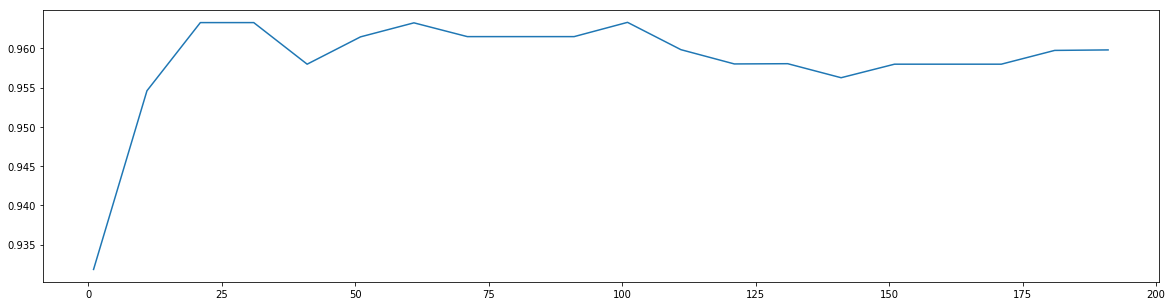

In [63]:
score_learn = []
for i in range(1, 200, 10):
    rfc =RandomForestClassifier(random_state=42, n_estimators=i)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    score_learn.append(score)
    
print(max(score_learn), score_learn.index(max(score_learn))*10 +1)

plt.figure(figsize=[20, 5])
plt.plot(range(1,200,10), score_learn)
plt.show()
plt.close()

0.9650300319764928 99


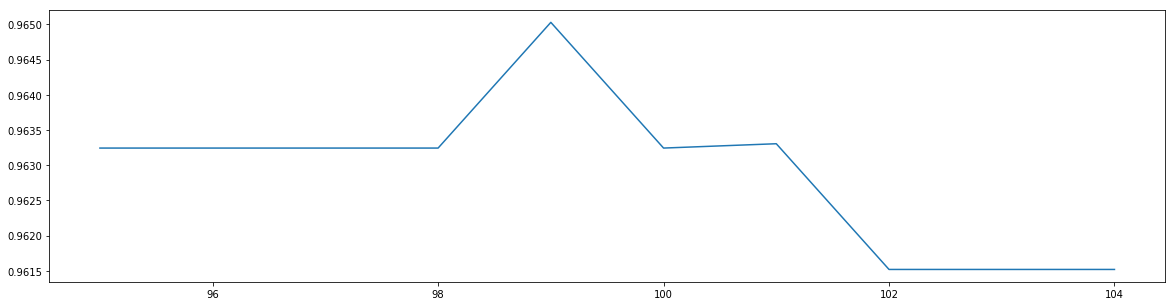

In [79]:
score_learn = []
for i in range(95, 105):
    rfc =RandomForestClassifier(random_state=42, n_estimators=i)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    score_learn.append(score)
    
print(max(score_learn), [*range(95,105)][score_learn.index(max(score_learn))])

plt.figure(figsize=[20,5])
plt.plot(range(95,105), score_learn)
plt.show()